# ANN - Iris
- TensorFlow & Keras 
-3 class (Multi-class Classification)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = sns.load_dataset('iris')
# df.head()
df.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

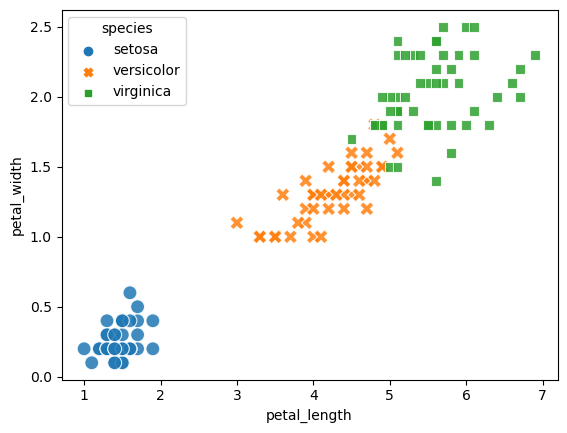

In [4]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species', 
                alpha=0.85, edgecolor='w', s=100)
plt.show()

In [5]:
class_names = np.unique(df.species)
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## X and y

In [6]:
X = df.drop('species', axis=1)
# X.head(6)
X.sample(6, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6


In [7]:
X[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df.species

In [9]:
y[:5]
# y[45:105]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

## Train-test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [12]:
y_train.shape, y_test.shape 

((112,), (38,))

In [13]:
y_train[:5]

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [14]:
y_test[:5]

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: species, dtype: object

## One-Hot Encoding

In [17]:
from tensorflow.keras.utils import to_categorical

def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    print(categories)
    return to_categorical(ids, len(categories))

y_train_1h = one_hot_encode(y_train).astype('int')
y_test_1h = one_hot_encode(y_test).astype('int')

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [16]:
y_train_1h[:4]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
y_test_1h[:4]

In [ ]:
y_train_1h.shape, y_test_1h.shape 

In [ ]:
X_train[:4]

In [ ]:
y_train[:4]

In [ ]:
y_train_1h[:4]

## Model
- Create a Model
- Compile
- Train

### Create


In [105]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()

hidden_node = 64
model.add(Dense(hidden_node, activation='relu', input_shape=(4,))) 
model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='softmax'))     # 3 class ขึ้นไป (Multi-class classification)
# model.add(Dense(1, activation='sigmoid'))   # 2 class (Binary classification)

In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 3)                 387       
                                                                 
Total params: 9,027
Trainable params: 9,027
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.output_shape

(None, 3)

In [87]:
# model.get_config()

### Compile & Train

In [106]:
model.compile(loss='categorical_crossentropy',  # รองรับ Classification 3 class ขึ้นไป
              optimizer='adam',
              metrics=['accuracy'])

In [126]:
# categorical_crossentropy ใช้ y train แบบ One-hot Encoding

import time

start = time.time()
history = model.fit(X_train, y_train_1h, epochs=40, batch_size=16, verbose=1, validation_split=0.25) 
end = time.time()

print(f"Time Taken {end - start:.3f} secs")

Epoch 1/40
6/6 [==============================] - 0s 39ms/step - loss: 0.3375 - accuracy: 0.8690 - val_loss: 0.4744 - val_accuracy: 0.8214
Epoch 2/40
6/6 [==============================] - 0s 17ms/step - loss: 0.3203 - accuracy: 0.8571 - val_loss: 0.4469 - val_accuracy: 0.8214
Epoch 3/40
6/6 [==============================] - 0s 17ms/step - loss: 0.3034 - accuracy: 0.8571 - val_loss: 0.4255 - val_accuracy: 0.8214
Epoch 4/40
6/6 [==============================] - 0s 14ms/step - loss: 0.2893 - accuracy: 0.8571 - val_loss: 0.4118 - val_accuracy: 0.8214
Epoch 5/40
6/6 [==============================] - 0s 15ms/step - loss: 0.2784 - accuracy: 0.8690 - val_loss: 0.4050 - val_accuracy: 0.8571
Epoch 6/40
6/6 [==============================] - 0s 18ms/step - loss: 0.2659 - accuracy: 0.8810 - val_loss: 0.3849 - val_accuracy: 0.8214
Epoch 7/40
6/6 [==============================] - 0s 18ms/step - loss: 0.2540 - accuracy: 0.8929 - val_loss: 0.3687 - val_accuracy: 0.8214
Epoch 8/40
6/6 [===========

## Evaluate

In [127]:
score = model.evaluate(X_test, y_test_1h, verbose=0)

print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.09917905181646347
Test accuracy: 0.9737


In [128]:
model.metrics_names

['loss', 'accuracy']

In [129]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

2/2 [==============================] - 0s 6ms/step


array([[0.999, 0.001, 0.   ],
       [0.091, 0.899, 0.01 ],
       [0.003, 0.932, 0.065],
       [0.999, 0.001, 0.   ]], dtype=float32)

In [130]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([0, 1, 1, 0], dtype=int64)

In [131]:
y_test[:4]

14        setosa
98    versicolor
75    versicolor
16        setosa
Name: species, dtype: object

In [132]:
_, y_test_enc = np.unique(y_test, return_inverse=True)  # Label encoding
y_test_enc[:4]
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_enc, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test_enc, y_pred_cat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


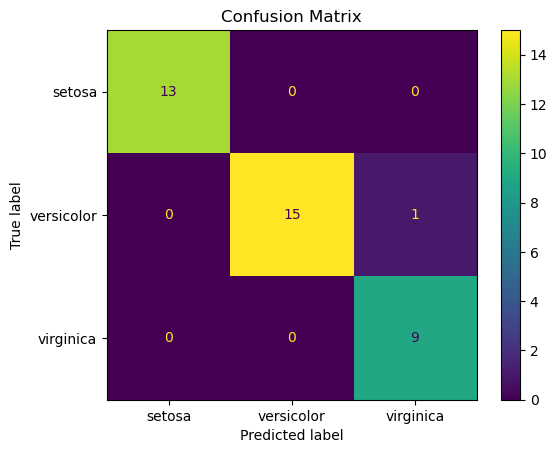

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_enc, y_pred_cat)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Loss and Accuracy Curves

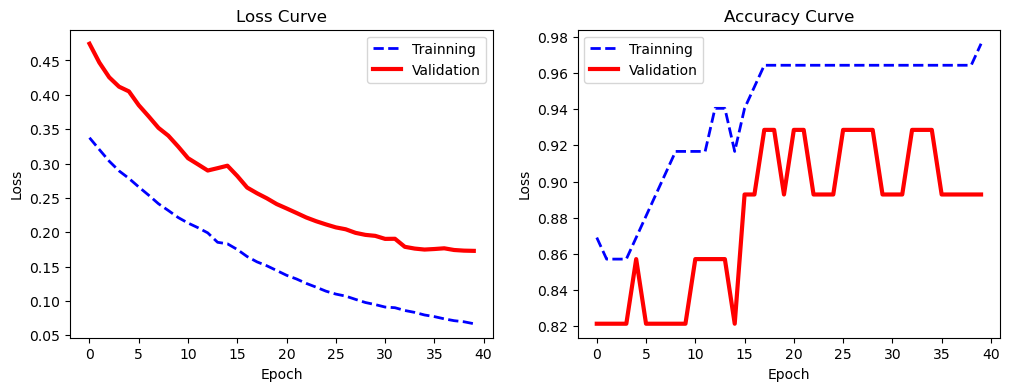

In [135]:
# 2 Columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)   # row column index
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
plt.title('Loss Curve')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)   # row column index
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

## Predict

In [137]:
X_new = [[8.1, 4.0, 5.9, 2.1], #  1
         [6.8, 3.6, 3.5, 1.4]] #  2

# X_new = [[8.1, 4.0, 5.9, 2.1]]

X_new_sc = sc.transform(X_new)
X_new_sc

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.73435494,  2.16998818,  1.21745768,  1.18556721],
       [ 1.15917263,  1.24920112, -0.14664056,  0.26414192]])

In [138]:
y_pred_pr = model.predict(X_new_sc)
y_pred_pr.round(3)

1/1 [==============================] - 0s 108ms/step


array([[0.   , 0.438, 0.562],
       [0.019, 0.963, 0.018]], dtype=float32)

In [139]:
y_pred = np.argmax(y_pred_pr, axis=1)
y_pred

array([2, 1], dtype=int64)

In [140]:
print(class_names[y_pred])

['virginica' 'versicolor']


## Decision Regions

In [141]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)    

In [ ]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 5.5

ax = plot_decision_regions(X_test, np.array(y_test_enc),

                    clf=model_no_ohe, feature_index=[2, 3],  
                    filler_feature_values={0: value, 1: value},
                    filler_feature_ranges={0: width, 1: width},
                    legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Iris (Hidden={})'.format(hidden_node))
# plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_new_sc[:,2][y_pred==0], X_new_sc[:,3][y_pred==0], marker='s', s=180, c='b')
plt.scatter(X_new_sc[:,2][y_pred==1], X_new_sc[:,3][y_pred==1], marker='^', s=230, c='#7d4128') # 
plt.scatter(X_new_sc[:,2][y_pred==2], X_new_sc[:,3][y_pred==2], marker='o', s=150, c='b')
plt.show()

4150/9600 [===========>..................] - ETA: 14s

## แบบฝึกหัด

- epochs 100 (เท่าเดิม) batch_size 64 (ใหญ่ขึ้น) ความแม่นยำจะได้น้อยกว่า เนื่องจาก batch_size ขนาดใหญ่ขึ้นทำให้จำนวนรอบย่อย (Iterations) ลดลง ถึงแม้ epochs เท่าเดิม เส้นกราฟของพล็อต Loss ยังไม่นิ่ง ดูเหมือนว่าจะมีแนวโน้มลงไปได้อีก
- epochs 100 (เท่าเดิม) batch_size (เล็กลง) ความแม่นยำจะได้ประมาณสูง แต่ละ epochs มีการวนรอบย่อย (Iterations) มากขึ้น เนื่องจาก batch_size ขนาดเล็กลง เมื่อ ดูกราฟของพล็อต Loss และ Accuracy พบว่า ประมาณ epoch 40 Loss เริ่มนิ่งแล้ว และ Accuracy ได้ค่าสูงสุด จากนั้น Train epoch ต่อไป ทำให้ Accuracy ตกลง ลักษณะ นี้ epochs สูงเกินไป ใช้เพียงแค่ 40-50 ก็เหมาะสมแล้ว (Train มากแล้วแย่ลง)
- epochs 10, batch_size 32
- เปลี่ยน Dense เป็น 8 หรือ 16
- ลองเพิ่มจำนวนชั้น Layer แล้วดูพล็อตขอบเขตการจำแนกของ Model